In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib import rcParams

rcParams["figure.dpi"] = 150

In [214]:
def campo_cuadrado(x):
    # x=campo electrico
    E_2=x**2
    return E_2

In [215]:
def incert_campo_cuadrado(i,j):
    # i=campo electrico
    # j=incertidumbre medida directa campo
    s_E_2=2*i*j
    return s_E_2

In [216]:
def factor_rizado(a):
    # a=pendiente del ajuste campo_cuadrado-potencia_transmitida
    factor_riz=(50/(0.215**2))/a
    return factor_riz

In [217]:
def incertidumbre_directa(b):
    # b=oscilacion de la medida
    S=b/np.sqrt(3)
    return S

In [218]:
def incertudumbre_rizado(y,k):
    # y=incertidumbre de la pendiente
    # k=pendiente del ajuste campo_cuadrado-potencia_transmitida
    s_r=(50/(0.215**2))*(y/(k**2))
    return s_r

In [219]:
data_1=np.loadtxt('Frecuencia_1.txt')

In [220]:
potencia_1=data_1[:,0]

In [221]:
campo_1=data_1[:,1]

Antes de hacer la regresion lineal calculo $E^2$, $s(E^2)$ y las incertidumbres directas:

In [222]:
E_1=campo_cuadrado(campo_1)

Para las oscilaciones de las medidas tendremos que:
$\Delta E=0.3$, $\Delta P_i=0.003$ y $\Delta P_r=0.001$

In [223]:
oscilaciones=np.array([0.3,0.003,0.001])

Obteniendo las incertidumbres directas:

In [224]:
incertidumbres_E_Pi_Pr=incertidumbre_directa(oscilaciones)
print(incertidumbres_E_Pi_Pr)

[0.17320508 0.00173205 0.00057735]


Ahora la incertidumbre $s(E^2)$:

In [225]:
S_E2_1=incert_campo_cuadrado(campo_1,0.173)

Realicemos la regresión lineal $E^2=a*P$

In [226]:
reg=linregress(potencia_1,E_1)

Obteniendo la pendiente a y su incertidumbre s(a):

In [227]:
a=reg.slope
print(a)

853.1189080864906


In [228]:
s_a=reg.stderr
print(s_a)

4.427381790099633


Calculemos ahora el factor de rizado(F_R_1) para esta pendiente y su incertidumbre(S_F_R_1):

In [229]:
F_R_1=factor_rizado(a)
print(F_R_1)

1.267895664983747


In [230]:
S_F_R_1=incertudumbre_rizado(s_a,a)
print(S_F_R_1)

0.006579924704149453


Vamos a graficas nuestros datos y el ajuste:

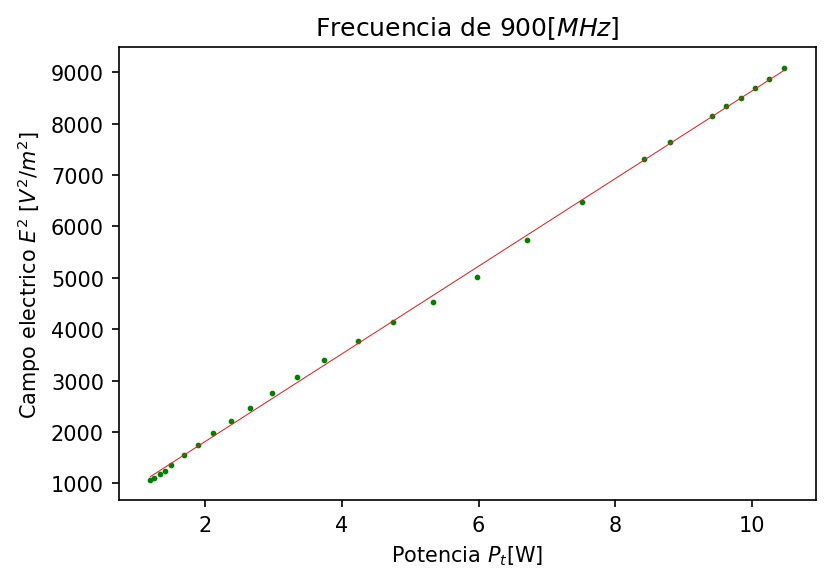

In [231]:
potencia_1_reg=np.array([potencia_1.min(),potencia_1.max()])
E_1_reg= a * potencia_1_reg + reg.intercept


plt.scatter(potencia_1,E_1, s=3, color='green')

plt.plot(potencia_1_reg,E_1_reg, color='C3', linewidth=0.5)

plt.xlabel('Potencia $P_t$[W]')
plt.ylabel('Campo electrico $E^2$ $[V^2/m^2]$')
plt.title('Frecuencia de $900[MHz]$')

plt.show()

#### Pasamos a hacer las dos ultimas frecuencias

In [232]:
data_23=np.loadtxt('Frecuencia_23.txt')

In [233]:
potencia_2 = data_23[:,0]

In [234]:
campo_2 = data_23[:,1]

In [235]:
potencia_3 = data_23[:,2]

In [236]:
campo_3 = data_23[:,3]

Sacamos los campos al cuadrado y sus incertidumbres, E_2 con S_E2_2 y E_3 con S_E2_3:

In [237]:
E_2=campo_cuadrado(campo_2)
S_E2_2=incert_campo_cuadrado(campo_2,0.173)
E_3=campo_cuadrado(campo_3)
S_E2_3=incert_campo_cuadrado(campo_3,0.173)

Hagamos ahora las regresiones lineales $E^2=a*P$:

In [238]:
reg_2=linregress(potencia_2,E_2)
reg_3=linregress(potencia_3,E_3)

Calculemos ahora el factor de rizado(F_R_2 y F_R_3) para esta pendiente y su incertidumbre(S_F_R_2 y S_F_R_3):

In [239]:
pendiente_2=reg_2.slope
pendiente_3=reg_3.slope
s_pendiente_2=reg_2.stderr
s_pendiente_3=reg_3.stderr
F_R_2=factor_rizado(pendiente_2)
S_F_R_2=incertudumbre_rizado(s_pendiente_2,pendiente_2)
F_R_3=factor_rizado(pendiente_3)
S_F_R_3=incertudumbre_rizado(s_pendiente_3,pendiente_3)

In [240]:
print(F_R_2)

1.0593955159745134


In [241]:
print(S_F_R_2)

0.010431362834593045


In [242]:
print(F_R_3)

1.110317554413415


In [243]:
print(S_F_R_3)

0.012630002123277733


Graficamos datos y ajustes:

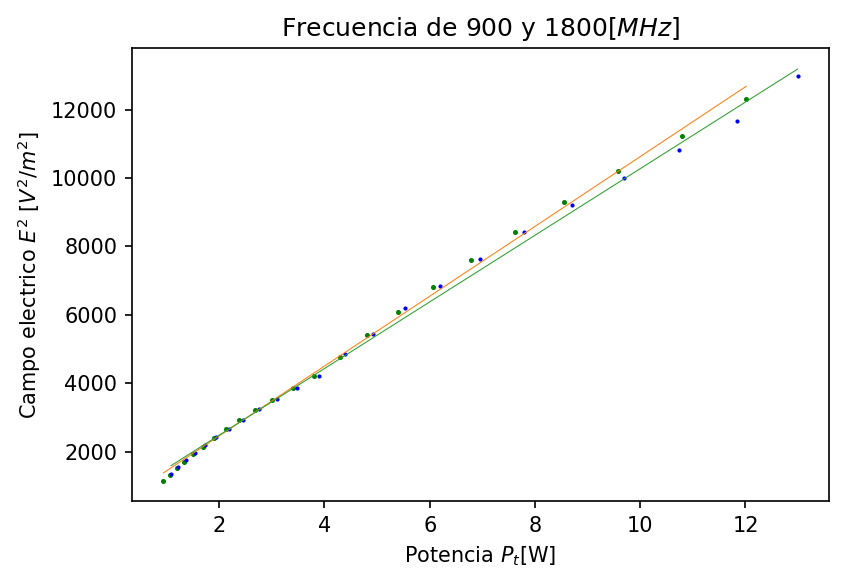

In [244]:
potencia_2_reg=np.array([potencia_2.min(),potencia_2.max()])
E_2_reg= pendiente_2 * potencia_2_reg + reg_2.intercept

potencia_3_reg=np.array([potencia_3.min(),potencia_3.max()])
E_3_reg= pendiente_3 * potencia_3_reg + reg_3.intercept


plt.scatter(potencia_2,E_2, s=2, color='green')

plt.scatter(potencia_3,E_3, s=1, color='blue')

plt.plot(potencia_2_reg,E_2_reg, color='C1', linewidth=0.5)

plt.plot(potencia_3_reg,E_3_reg, color='C2', linewidth=0.5)

plt.xlabel('Potencia $P_t$[W]')
plt.ylabel('Campo electrico $E^2$ $[V^2/m^2]$')
plt.title('Frecuencia de $900$ y $1800$$[MHz]$')

plt.show()

# Gráfica y datos finales:

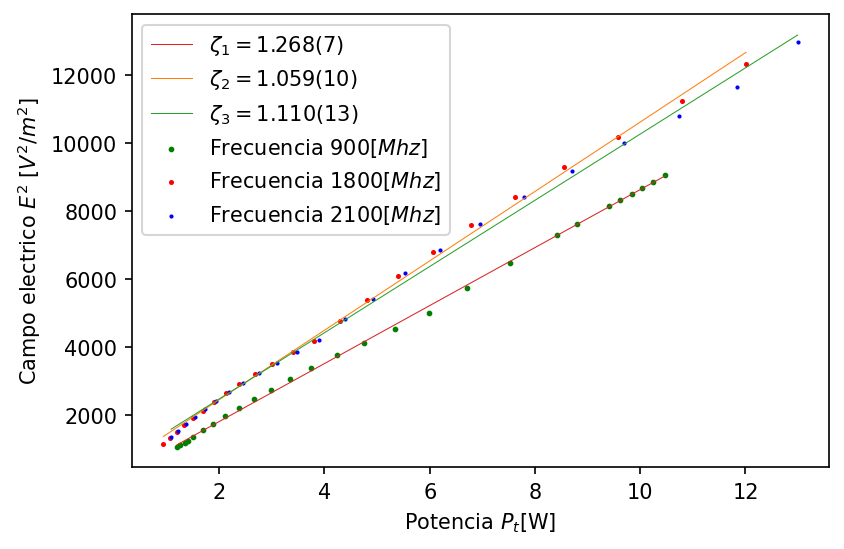

In [245]:
plt.plot(potencia_1_reg,E_1_reg, color='C3', linewidth=0.5, label='$\zeta_1=1.268(7)$')

plt.plot(potencia_2_reg,E_2_reg, color='C1', linewidth=0.5, label='$\zeta_2=1.059(10)$')

plt.plot(potencia_3_reg,E_3_reg, color='C2', linewidth=0.5, label='$\zeta_3=1.110(13)$')

plt.scatter(potencia_1,E_1, s=3, color='green', label='Frecuencia $900[Mhz]$')

plt.scatter(potencia_2,E_2, s=2, color='red', label='Frecuencia $1800[Mhz]$')

plt.scatter(potencia_3,E_3, s=1, color='blue', label='Frecuencia $2100[Mhz]$')

plt.xlabel('Potencia $P_t$[W]')
plt.ylabel('Campo electrico $E^2$ $[V^2/m^2]$')
plt.legend()

plt.savefig('Grafica_Factor_R.pdf')

plt.show()

# Para la frecuencia de 900Mhz obtenemos

In [246]:
print(potencia_1)
print(campo_1)
print(E_1)
print(S_E2_1)

[ 1.198  1.255  1.345  1.407  1.506  1.686  1.89   2.117  2.372  2.659
  2.981  3.339  3.744  4.239  4.754  5.334  5.982  6.707  7.518  8.416
  8.805  9.413  9.617  9.835 10.04  10.25  10.47 ]
[32.7 33.4 34.3 35.3 36.9 39.5 41.9 44.5 47.  49.7 52.5 55.4 58.3 61.4
 64.3 67.3 70.8 75.7 80.5 85.5 87.4 90.3 91.3 92.2 93.2 94.2 95.3]
[1069.29 1115.56 1176.49 1246.09 1361.61 1560.25 1755.61 1980.25 2209.
 2470.09 2756.25 3069.16 3398.89 3769.96 4134.49 4529.29 5012.64 5730.49
 6480.25 7310.25 7638.76 8154.09 8335.69 8500.84 8686.24 8873.64 9082.09]
[11.3142 11.5564 11.8678 12.2138 12.7674 13.667  14.4974 15.397  16.262
 17.1962 18.165  19.1684 20.1718 21.2444 22.2478 23.2858 24.4968 26.1922
 27.853  29.583  30.2404 31.2438 31.5898 31.9012 32.2472 32.5932 32.9738]


# Para la frecuencia de 1800Mhz obtenemos

In [247]:
print(potencia_2)
print(campo_2)
print(E_2)
print(S_E2_2)

[ 0.941  1.063  1.191  1.338  1.499  1.683  1.892  2.121  2.379  2.672
  2.997  3.393  3.808  4.286  4.809  5.397  6.057  6.791  7.629  8.561
  9.586 10.79  12.01 ]
[ 33.8  36.3  38.8  41.3  43.9  46.2  49.   51.5  54.   56.8  59.3  62.1
  64.8  69.   73.5  78.   82.5  87.2  91.8  96.4 101.  106.  111. ]
[ 1142.44  1317.69  1505.44  1705.69  1927.21  2134.44  2401.    2652.25
  2916.    3226.24  3516.49  3856.41  4199.04  4761.    5402.25  6084.
  6806.25  7603.84  8427.24  9292.96 10201.   11236.   12321.  ]
[11.6948 12.5598 13.4248 14.2898 15.1894 15.9852 16.954  17.819  18.684
 19.6528 20.5178 21.4866 22.4208 23.874  25.431  26.988  28.545  30.1712
 31.7628 33.3544 34.946  36.676  38.406 ]


# Para la frecuencia de 2100Mhz obtenemos

In [248]:
print(potencia_3)
print(campo_3)
print(E_3)
print(S_E2_3)

[ 1.086  1.221  1.371  1.54   1.731  1.946  2.184  2.454  2.757  3.097
  3.479  3.9    4.385  4.921  5.527  6.2    6.952  7.791  8.707  9.687
 10.74  11.84  12.99 ]
[ 36.8  39.3  41.7  44.1  46.8  49.2  51.7  54.2  57.   59.5  62.2  64.9
  69.6  73.7  78.7  82.8  87.3  91.8  95.9 100.  104.  108.  114. ]
[ 1354.24  1544.49  1738.89  1944.81  2190.24  2420.64  2672.89  2937.64
  3249.    3540.25  3868.84  4212.01  4844.16  5431.69  6193.69  6855.84
  7621.29  8427.24  9196.81 10000.   10816.   11664.   12996.  ]
[12.7328 13.5978 14.4282 15.2586 16.1928 17.0232 17.8882 18.7532 19.722
 20.587  21.5212 22.4554 24.0816 25.5002 27.2302 28.6488 30.2058 31.7628
 33.1814 34.6    35.984  37.368  39.444 ]
